## DS4M Project Code

# **Exploring Visitor Trends in Portugal: A Data-Driven Perspective**
**Data Science for Marketing** |
Outomn Semester - 2024/2025



Student Number  | Student Name
-------------------|------------------
20240108| Catarina Sousa
20240125|Maria Rita Correia
20211619       | Mariana Takimura
20241482 | Tomás Gomes

> ⚠️ **Disclamer**: All insights are according to the respective extraction date

# Table of contents

1. [Preparing the Data](#preparing)  
  1.1. [Importing Necessary Libraries](#importing)

  1.2. [Importing Datasets](#datasets)
  
2. [Data Understanding](#understanding)
  
  2.1. [Preliminary Analysis](#preliminary)
  
  2.2. [Missing Values](#missing)

  2.3. [Incoherences Check](#incoherences)

  2.4. [Visualizations](#vis)
3. [Summary](#summary)



---



# *EuropeTop100Attractions_ENG_20190101_20210821* dataset description

## Sheet **Reviews**


| **Feature**           | **Type**    | **Description**                                                                                                              |
|------------------------|-------------|------------------------------------------------------------------------------------------------------------------------------|
| **localID**           | string      | ID of the attraction                                                                                                         |
| **extractionDate**    | date        | Date when the review was extracted                                                                                           |
| **globalRating**      | numeric     | Global rating of the attraction at the time of the review extraction (1 to 5 stars)                                          |
| **positionOnRanking** | numeric     | Position in TripAdvisor's regional ranking at the extraction date                                                            |
| **sitesOnRanking**    | numeric     | Total number of attractions in TripAdvisor's regional ranking at the extraction date                                         |
| **totalReviews**      | numeric     | Total reviews written for the attraction at the time of the review extraction                                                |
| **userName**          | string      | User name of the TripAdvisor user who posted the review. Format: first@second (public name@unique identifier)                |
| **userLocation**      | string      | Location of the user who posted the review (optional field; many users do not provide their location)                        |
| **userContributions** | numeric     | Number of reviews written by the user on TripAdvisor at the moment of extraction                                             |
| **tripType**          | string      | Type of trip (optional field)                                                                                                |
| **reviewWritten**     | date        | Date when the review was published                                                                                           |
| **reviewVisited**     | date        | Date when the customer visited the attraction. Day is always 1 (TripAdvisor only asks for year and month, not the exact day) |
| **reviewRating**      | numeric     | Quantitative rating assigned by the user (1 to 5 stars)                                                                      |
| **reviewLanguage**    | string      | Language the review was written in (always "en" for English)                                                                 |
| **reviewFullText**    | string      | Full text of the review (optional; not considered for grading as Text Mining is not covered in this course)                  |

## Sheet: Attractions


Information about the attractions.

| Column Name | Data Type | Description                                       |
|-------------|-----------|---------------------------------------------------|
| ID          | string    | ID of the attraction                              |
| Name        | string    | Name of the attraction                            |
| Country     | string    | Name of the country or region                     |
| ISO         | string    | ISO code of the country or region                 |

## *Holidays.csv* dataset description

| Column Name          | Data Type   | Description                                                                 |
|----------------------|-------------|-----------------------------------------------------------------------------|
| countryOrRegion      | string      | Country or region full name                                                  |
| countryOrRegionCode  | string      | Country or region in ISO format                                              |
| date                 | date        | Date of the holiday                                                          |
| holidayName          | string      | Full name of the holiday                                                     |
| isPaidTimeOff        | boolean     | Indicates whether most people have paid time off on this date (only for US, GB, and India; NULL means unknown) |
| normalizeHolidayName | string      | Normalized name of the holiday                                               |


<a name="preparing"></a>
# 1. Preparing the Data


<a name="importing"></a>
## 1.1 Importing Necessary Libraries </font>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

<a name="introduction"></a>    
## 1.2 Importing Datasets <font>

In this seccion we will be importing the two datasets described above to proceed to their analysis and understanding.

In [3]:
path_drive = "/content/drive/MyDrive/DS4M_PROJECT/"
list_subfolders = os.listdir(path_drive)
list_subfolders

['Holidays.csv',
 'EuropeTop100Attractions_ENG.xlsx',
 'DS4M_GroupProject.ipynb',
 'World_Cities.xlsx']

**EuropeTop100Attractions_ENG** Dataset

This dataset is an excell file, that contains two sheets of data according to  the project description, To confirm this, we extracted the sheets names to correctly import the data.

In [4]:
top_attractions = pd.ExcelFile("/content/drive/MyDrive/DS4M_PROJECT/EuropeTop100Attractions_ENG.xlsx")
top_attractions.sheet_names

['Reviews', 'Attractions']

<a name="reviews"></a>
<font color='#FDB813'>
### **Reviews** </font> Dataset

In [5]:
reviews = pd.read_excel("/content/drive/MyDrive/DS4M_PROJECT/EuropeTop100Attractions_ENG.xlsx", sheet_name="Reviews")

<font color='#00D30F'>

### **Attractions** </font> Dataset

In [6]:
attractions = pd.read_excel("/content/drive/MyDrive/DS4M_PROJECT/EuropeTop100Attractions_ENG.xlsx", sheet_name="Attractions")

<font color='#0095DA'>

### **Holidays** </font> Dataset

With this dataset, we proceded to import it as a csv (comma separated value) file, by oppening it we could see that the separations were made with an semicolon ';'.

In [7]:
holidays = pd.read_csv("/content/drive/MyDrive/DS4M_PROJECT/Holidays.csv", sep=";",  index_col= 0)

<a name="understanding"></a>
# 2. Data Understanding

In this preliminary analysis it was used *.sample()*, *.info()*, *.describe()* and *.is_unique* methods so we can have an overview of the datasets and their understanding. We also checked if the data allowed us to set a column as an indexe with the method *.set_index()*.

<a name="preliminary"></a>
## 2.1. Preliminary Analysis


<font color='#FDB813'>

### **Reviews** </font> Dataset

In [8]:
reviews.sample(10)

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
79943,MAG069,2021-08-21 14:25:08.071,4.5,2,6,8582,roopa5@roopa5,"Mumbai, India",31,Solo,2019-10-22,2019-10-01,4,en,Nature heals and certainly at Kew gardens u ex...
35625,MAG012,2021-08-20 14:06:03.304,4.5,2,382,34703,HungryofHampshire@hungryofhampshire,"Aldershot, UK",113,Couples,2019-03-12,2019-03-01,4,en,Worth prebooking online to avoid the queues ro...
59969,MAG032,2021-08-21 10:26:43.740,4.5,2,71,18392,PatMcKenzie@PatMcKenzie,"Regina, Canada",166,NaN,2019-10-05,2019-09-01,5,en,We followed our fellow trip advisors advice an...
73344,MAG048,2021-08-21 13:18:25.981,4.5,1,91,12696,DavieU@DavieU,Dubai,239,Couples,2019-07-05,2019-06-01,5,en,About 40 mins on the hydrofoil from St Petersb...
43380,MAG018,2021-08-20 15:21:00.636,4.0,1,82,26328,Bonnieness91@Bonnieness91,"Island of Malta, Malta",225,Friends,2019-05-16,2019-03-01,5,en,Spent a lovely day here visiting the palace an...
46025,MAG021,2021-08-20 15:46:38.853,4.5,1,355,24454,roxylarousse@roxylarousse,"Montreal, Canada",93,NaN,2019-09-14,2019-09-01,4,en,The bridge itself is nothing to talk about. It...
50921,MAG024,2021-08-20 16:32:09.137,4.5,1,188,23131,Verified Traveler@easydriveallday,"Los Angeles, CA",21,NaN,2019-09-23,2019-09-01,5,en,"This location is in the middle of town, but so..."
27695,MAG008,2021-08-20 12:51:03.269,4.5,1,199,42192,Joseph310@Joseph310,"Kent, CT",277,Couples,2019-05-27,2019-04-01,5,en,A return visit after 40 years ... truly amazin...
80940,MAG069,2021-08-21 14:35:10.251,4.5,2,6,8582,Ventoraisle@Ventoraisle,"Faversham, UK",104,Couples,2019-03-03,2019-03-01,5,en,Went to see the orchids at Kew the absolutely ...
12652,MAG003,2021-08-20 10:23:44.293,4.5,7,2383,65646,Joyce S@jbf410,"Alpharetta, GA",13,NaN,2019-10-30,2019-10-01,4,en,We really enjoyed the Warden tour! Matt was v...


> From the *.sample()* method that was runned sometimes, we gathered that:
- ``localID`` won't be used as index since there is repeated values making sense according to the dataset description
- ``localID`` may have some incorrect values such as "genis" and "u" (18978; 19960, 21020)
- ``userLocation`` and ``tripeType`` has some NaN values, this will be further investigated later on (; 21020, 46011, 9400)

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78651 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

> From the *.info()* method we now know that the <font color='#FDB813'>**Reviews** </font> Dataset has:
- 92120 entries
- 15 columns
- There are missing values within the variables (6)`userName`, (7)`userLocation`, (9)`tripType` and (11)`reviewVisited`

In [10]:
display("Numeric:", reviews.describe(include=np.number))

'Numeric:'

,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userContributions,reviewRating
count,92120.000000,92120.000000,92120.000000,92120.000000,92120.000000,92120.000000
mean,4.485166,3.914590,748.263537,40556.601813,477.520560,4.578658
std,0.178085,4.843013,802.742304,42914.381014,7270.518677,0.792693
min,4.000000,1.000000,5.000000,5179.000000,0.000000,1.000000
25%,4.500000,1.000000,154.000000,14152.000000,20.000000,4.000000
50%,4.500000,2.000000,484.000000,24454.000000,66.000000,5.000000
75%,4.500000,6.000000,1186.000000,51324.000000,215.000000,5.000000
max,5.000000,55.000000,3837.000000,163828.000000,607732.000000,5.000000


> The *.describe()* method for numeric variables shows us:
- ``globalRating`` has a high minimum value but credible since it is the global rating of the attraction
- ``positionOnRanking`` has an odd maximum value but credible since it is the position in TripAdvisor's regional ranking
- ``sitesOnRanking`` has a high maximum value but credible since it is the total number of attractions in TripAdvisor's regional ranking
- ``userContributions`` has a minimum of 0 not making much sense since they have to have at least one review

In [11]:
display("Non-numeric:", reviews.describe(include=object))

'Non-numeric:'

,localID,userName,userLocation,tripType,reviewLanguage,reviewFullText
count,92120,92100,78651,63052,92120,92120
unique,100,65785,12612,5,1,85088
top,MAG001,Malgorzata@Margo7850p,"London, UK",Couples,en,Is a nice place to visit when you visit Barcel...
freq,8309,31,3710,31702,92120,3


> The *.describe()* method for Non-numeric variables shows us:
- ``userName``,	``userLocation`` and	``tripType`` as seen before, their count doesn't match the total entries (they have missing values)
- ``tripType`` seems to have only five categories, given that in previous analysis we discovered that some values take the NaN numenclature, this matter will be analysed futher
- ``reviewFullText`` seems odd that the unique value for this variable doesn't match its count and that the fequency is 3 and should be 1 since no review should be equal



In [12]:
display('Date/Time:', reviews.describe(include=np.datetime64))

'Date/Time:'

,extractionDate,reviewWritten,reviewVisited
count,92120,92120,91410
mean,2021-08-20 22:09:20.598932992,2019-09-02 16:05:57.967868160,2019-07-19 02:09:01.122415104
min,2021-08-20 08:24:40.077000,2019-01-01 00:00:00,2015-10-01 00:00:00
25%,2021-08-20 12:08:10.831000064,2019-05-11 00:00:00,2019-04-01 00:00:00
50%,2021-08-20 15:46:58.171000064,2019-08-07 00:00:00,2019-07-01 00:00:00
75%,2021-08-21 12:35:39.817250048,2019-11-05 00:00:00,2019-10-01 00:00:00
max,2021-08-21 16:27:17.026000,2021-08-21 00:00:00,2021-08-01 00:00:00


In [13]:
reviews['localID'].is_unique

False

> This code confirms our first insight that ``localID`` would not serve as an index for this dataset since the return for the *.is_unique* method comes as False (meaning that the values in the attribute are not unique)

-----

<font color='#00D30F'>

### **Attractions** </font> Dataset

In [14]:
attractions.sample(10)

,ID,Name,Country,ISO
82,MAG083,Queen Emma Pontoon Bridge,Curaçao,NL
45,MAG046,Wieliczka Salt Mine,Poland,PL
26,MAG027,Church of the Savior on Spilled Blood,Russia,RU
40,MAG041,Państwowe Muzeum Auschwitz-Birkenau,Poland,PL
8,MAG009,Canal Grande,Italy,IT
86,MAG087,Pont du Gard,France,FR
89,MAG090,Greenwich,England,UK
57,MAG058,Acueduct of Segovia,Spain,ES
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
43,MAG044,Abbaye du Mont-Saint-Michel,France,FR


> From the *.sample()* method that was runned sometimes, we gathered that:
- ``ID`` will most likely to be the index for this dataset
- ``Country`` we found a strange entrie named Curaçao

In [15]:
attractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       100 non-null    object
 1   Name     100 non-null    object
 2   Country  100 non-null    object
 3   ISO      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


> From the *.info()* method we now know that the <font color='#00D30F'> **Attractions** </font> Dataset has:
- 100 entries
- 4 columns
- no missing values identified

In [16]:
attractions.describe()

,ID,Name,Country,ISO
count,100,100,100,100
unique,100,99,26,25
top,MAG001,Old Town,Spain,ES
freq,1,2,17,17


> The *.describe()* method indicates us:
- From the 100 ``Names`` one of them is repeated two times
- It seems that ``Country`` and ``ISO`` have an inconsistency between them, the unique count should be equal since they are connected

In [17]:
attractions['ID'].is_unique

True

> This code confirms that ``ID`` can be the index for this dataset since the return for the *.is_unique* method comes as True (meaning that the values in the attribute are all unique)

As so, in the code bellow ``ID`` is set as an index.

In [18]:
attractions.set_index('ID', inplace=True)

In [19]:
attractions.head()

,Name,Country,ISO
ID,,,
MAG001,Basilica of the Sagrada Familia,Spain,ES
MAG002,Parc Guell,Spain,ES
MAG003,Tower of London,England,UK
MAG004,Casa Batllo,Spain,ES
MAG005,Staromestske namesti,Czech Republic,CZ


We can confirm the changes were made correctly.

--------------

<font color='#0095DA'>

### **Holidays** </font> Dataset

In [20]:
holidays.sample(10)

,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
66833,Scotland,New Year Holiday (Observed),New Year Holiday,NaN,NaN,2094-01-04
5615,France,Fête nationale,Fête nationale,NaN,FR,1981-07-14
46343,Sweden,Söndag,Söndag,NaN,SE,2056-12-17
21866,Wales,Diamond Jubilee of Elizabeth II,Diamond Jubilee of Elizabeth II,NaN,NaN,2012-06-05
3588,Denmark,Pinsedag,Pinsedag,NaN,DK,1977-05-29
17190,South Africa,Day of Goodwill,Day of Goodwill,NaN,ZA,2003-12-26
51407,Spain,Epifanía del Señor,Epifanía del Señor,NaN,ES,2066-01-06
26178,Sweden,Söndag,Söndag,NaN,SE,2020-05-10
13470,Norway,Første nyttårsdag,Første nyttårsdag,NaN,NO,1997-01-01
57330,Argentina,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception],NaN,AR,2076-12-08


> From the *.sample()* method that was runned sometimes, we gathered that:
- This dataset most likely won't have an attribute to set as index
- ``normalizedHolidayName`` seems to be equal to the ``holidayName``, this will be verified later
- ``isPaidTimeOff`` and ``countryRegionCode`` has NaN values, this will be further investigated (66294, 29254, 49128, 61537, 17079; )
- ``countryRegionCode`` has some discrepencies relating to ``countryOrRegion`` (49128 - United Kingdom - GB)

In [21]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69557 entries, 0 to 69556
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   countryOrRegion       69557 non-null  object
 1   holidayName           69557 non-null  object
 2   normalizeHolidayName  69557 non-null  object
 3   isPaidTimeOff         3934 non-null   object
 4   countryRegionCode     64559 non-null  object
 5   date                  69557 non-null  object
dtypes: object(6)
memory usage: 3.7+ MB


> From the *.info()* method we now know that the <font color='#0095DA'> **Holidays** </font> Dataset has:
- 69557 entries
- 6 columns
- There are missing values within the cariables: (3) ``isPaidTimeOff`` and (4) ``countryRegionCode``
- ``isPaidTimeOff`` due to the nature of the variable described in the metadata, the variable should be altered from a *object* data type to a *boolean* data type but since the variable has missing values, it will be dealt with in the Data Preparation Notebook

In [22]:
holidays['date'] = pd.to_datetime(holidays['date'])

In [23]:
holidays.describe()

,date
count,69557
mean,2035-09-01 05:03:55.956122368
min,1970-01-01 00:00:00
25%,2004-05-01 00:00:00
50%,2035-12-26 00:00:00
75%,2067-05-08 00:00:00
max,2098-12-28 00:00:00


> The *.describe()* method shows us:
- ``holidayName`` and ``normalizedHolidayName`` don't have equal unique count refuting our previous assumption, this will be verified later
- ``isPaidTimeOff`` and ``countryRegionCode`` have missing values as said above
- the most frequent holiday is 2001-01-01 from the variable ``date``, it is expected as january first is an international holiday

In [24]:
holidays['countryOrRegion'].is_unique

False

> This code confirms our first insight that ``countryOrRegion`` would not serve as an index for this dataset since the return for the *.is_unique* method comes as False (meaning that the values in the attribute are not unique)

<a name="missing"></a>
## 2.2. Missing Values

In this section we will be verifying if the datasets have missing values as seen in the Preliminary Analysis.We will be using the *.isnull().sum()* methods and dilplaying them so the numenclature of the missing values can be extracted.

<font color='#FDB813'>

### **Reviews** </font> Dataset

In [25]:
reviews.isnull().sum()

,0
localID,0
extractionDate,0
globalRating,0
positionOnRanking,0
sitesOnRanking,0
totalReviews,0
userName,20
userLocation,13469
userContributions,0
tripType,29068


> As previously mentioned there are missing values within the variables ``userName``,
``userLocation``, ``tripType`` and ``reviewVisited``:
- `userName`: 20 missing values
- `userLocation`: 13,469 missing values (~15% of the dataset)
- `tripType`: 29,068 missing values (~32% of the dataset)
- `reviewVisited`: 710 missing values (~0.8% of the dataset)

In [26]:
rcol1 = ['userName']
rc1 = reviews[rcol1].apply(pd.Series.value_counts, dropna=False)
rcol2 = ['userLocation']
rc2 = reviews[rcol2].apply(pd.Series.value_counts, dropna=False)
rcol3 = ['tripType']
rc3 = reviews[rcol3].apply(pd.Series.value_counts, dropna=False)
rcol4 = ['reviewVisited']
rc4 = reviews[rcol4].apply(pd.Series.value_counts, dropna=False)
display(rc1,rc2,rc3,rc4)

,userName
userName,
Malgorzata@Margo7850p,31
KodoDrummer@KodoDrummer,24
NaN,20
Michele Amico🇮🇹🇮🇹🇮🇹🇮🇹@micheleaQ8239JH,19
Dimitris L@750dimitrisl,17
...,...
Mogoshadi S@mogoshadis,1
Crystal Chris@CrystalPistol007,1
Grantley@GrantleyMorgan,1


,userLocation
userLocation,
NaN,13469
"London, UK",3710
"Melbourne, Australia",773
"Sydney, Australia",736
"New York City, NY",699
...,...
"Wallaroo, Australia",1
"Teresopolis, RJ",1
"Pittsworth, Australia",1


,tripType
tripType,
Couples,31702
NaN,29068
Family,13596
Friends,11759
Solo,5127
Business,868


,reviewVisited
reviewVisited,
2019-09-01,8497
2019-05-01,8466
2019-06-01,7962
2019-07-01,7736
2019-08-01,7448
2019-10-01,6964
2019-04-01,6660
2019-03-01,5381
2019-02-01,3764


> From this display we gathered that ``userName``, ``userLocation`` and ``tripType`` missing values take 'NaN' format and that ``reviewVisited`` as 'NaT'.

In [27]:
user_location_check = reviews.groupby('userName')['userLocation']
display(user_location_check)

In [28]:
user_location_check = reviews.groupby('userName')['userLocation'].nunique()
user_location_check.head(20)


,userLocation
userName,
#1 Best@Number1Best,1
#Ciccone@932emzc,1
#Travelendlessbeauty@travelendlessbeauty,1
#moving mountains@peaceat28,1
#taxi de Barcelona #taxi#aeropuer@cavataxi,1
#travelswithhugodog@ajotraveller2016,1
&Y B@CopCop83,0
'Tis Me@DrSuess2015,1
--Isma-1010@--Isma-1010,1


In [29]:
# Group by 'userName' and check if both conditions are met
inconsistent_users = reviews.groupby('userName').apply(lambda x: x['userLocation'].isna().any() and x['userLocation'].notna().any())

# Filter for users with inconsistencies
inconsistent_users = inconsistent_users[inconsistent_users].index.tolist()

# Display the inconsistent users
print("Users with inconsistent userLocation values:")
print(inconsistent_users)

# Optionally, display the rows for these users
display(reviews[reviews['userName'].isin(inconsistent_users)])

Users with inconsistent userLocation values:
['Julie L@M1853RJjuliel']


<ipython-input-29-2dfc3151575d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inconsistent_users = reviews.groupby('userName').apply(lambda x: x['userLocation'].isna().any() and x['userLocation'].notna().any())


,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
28077,MAG008,2021-08-20 12:54:37.975,4.5,1,199,42192,Julie L@M1853RJjuliel,NaN,63,NaN,2019-02-20,2019-02-01,5,en,"This is a stunning place, with several buildin..."
84769,MAG075,2021-08-21 15:13:03.168,4.5,3,17,7940,Julie L@M1853RJjuliel,"Spalding, UK",63,Couples,2019-03-24,2019-03-01,5,en,"Lots of places say they’re a great day out, bu..."


>We can see that one user has both their location and a missing value in the feature ``userLocation``

---

<font color='#00D30F'>

### **Attractions** </font> Dataset

In [30]:
attractions.isnull().sum()

,0
Name,0
Country,0
ISO,0


> This table confirms our initial insight that thera are no missing values identified in this dataset

---

<font color='#0095DA'>

### **Holidays** </font> Dataset

In [31]:
holidays.isnull().sum()

,0
countryOrRegion,0
holidayName,0
normalizeHolidayName,0
isPaidTimeOff,65623
countryRegionCode,4998
date,0


> As previously mentioned, ``isPaidTimeOff`` and ``countryRegionCode`` has missing values:
- (3) ``isPaidTimeOff``: 65,623 missing values (~94% of the dataset)
- (4) ``countryRegionCode``: 4,998 missing values (~7% of the dataset)

In [32]:
hcol1 = ['isPaidTimeOff']
hc1 = holidays[hcol1].apply(pd.Series.value_counts, dropna=False)
hcol2 = ['countryRegionCode']
hc2 = holidays[hcol2].apply(pd.Series.value_counts, dropna=False)
display(hc1,hc2)

,isPaidTimeOff
isPaidTimeOff,
NaN,65623
True,2695
False,1239


,countryRegionCode
countryRegionCode,
SE,8394
NO,7924
NaN,4998
AR,2263
CO,2187
JP,2094
FI,1934
GB,1853
HU,1826


> Both variables missing values assume 'NaN' numenclature

<a name="incoherences"></a>

## 2.3. Incoherences Check

This section of the Notebook aims to verify if there exist any inconsistent scenarios previously mentioned in the 2.1. Preliminary Analyis  and new ones within the datasets that is somewhat unreliable with the definitions of the features.

<font color='#FDB813'>

### **Reviews** </font> Dataset

In the incoherences check for the <font color='#FDB813'>**Reviews** </font> Dataset
 we will analyze insights such as:
 - check for duplicates
 - "u" and "genis" in the ``localID`` feature
 - the maximum and mininmum value for the feature ``userContributions``
 - if the count of ``userName`` is equal to the ``userConribution``
 - the missmatch of unique and count value for the feature ``reviewFullText``
 - see if there is any ``reviewWritten`` before the actual trip happened (``reviewVisited``)

In [33]:
reviews.duplicated().value_counts()

,count
False,92120


In [34]:
display(reviews['localID'].unique())

array(['MAG001', 'MAG002', 'MAG003', 'MAG004', 'genis', 'u', 'MAG007',
       'MAG008', 'MAG009', 'MAG010', 'MAG011', 'MAG012', 'MAG013',
       'MAG014', 'MAG015', 'MAG016', 'MAG017', 'MAG018', 'MAG019',
       'MAG020', 'MAG021', 'MAG022', 'MAG023', 'MAG024', 'MAG025',
       'MAG026', 'MAG027', 'MAG028', 'MAG029', 'MAG030', 'MAG031',
       'MAG032', 'MAG033', 'MAG034', 'MAG035', 'MAG036', 'MAG037',
       'MAG038', 'MAG039', 'MAG040', 'MAG041', 'MAG042', 'MAG043',
       'MAG044', 'MAG045', 'MAG046', 'MAG047', 'MAG048', 'MAG049',
       'MAG050', 'MAG051', 'MAG052', 'MAG053', 'MAG054', 'MAG055',
       'MAG056', 'MAG057', 'MAG058', 'MAG059', 'MAG060', 'MAG061',
       'MAG062', 'MAG063', 'MAG064', 'MAG065', 'MAG066', 'MAG067',
       'MAG068', 'MAG069', 'MAG070', 'MAG071', 'MAG072', 'MAG073',
       'MAG074', 'MAG075', 'MAG076', 'MAG077', 'MAG078', 'MAG079',
       'MAG080', 'MAG081', 'MAG082', 'MAG083', 'MAG084', 'MAG085',
       'MAG086', 'MAG087', 'MAG088', 'MAG089', 'MAG090', '

In [35]:
reviews[(reviews['localID'] == 'genis') | (reviews['localID'] == 'u')]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
18500,genis,2021-08-20 11:19:08.189,4.5,2,1234,55541,Adrian's_Quests@Adrians_Quests,"Weiden, Germany",371,NaN,2021-08-18,2021-08-01,5,en,"A very clean, well kept city center, a conglom..."
18501,genis,2021-08-20 11:19:08.230,4.5,2,1234,55541,Angela S@angelasJ5518LZ,"Riga, Latvia",67,NaN,2021-08-18,2021-08-01,5,en,"One of the must-see places, it is impossible t..."
18502,genis,2021-08-20 11:19:08.258,4.5,2,1234,55541,Arsila@shibho,"Amsterdam, The Netherlands",57,NaN,2021-08-15,2020-09-01,5,en,The heart of Prague does not disappoint. Bewar...
18503,genis,2021-08-20 11:19:08.280,4.5,2,1234,55541,WeHa 98@WeHa98,"Aschaffenburg, Germany",212,NaN,2021-07-31,2021-07-01,5,en,Wow factor!! Such a beautiful place to sit an...
18504,genis,2021-08-20 11:19:08.300,4.5,2,1234,55541,Aleks@a_komii,"Szczecin, Poland",130,NaN,2021-07-26,2021-07-01,5,en,Beautiful place to walk around have a nice str...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24055,u,2021-08-20 12:17:41.028,4.5,8,487,51324,Nicola B@NicolaABaxter,"Edinburgh, UK",215,Couples,2019-01-01,2018-12-01,5,en,"Most enjoyable return visit, with many more ar..."
24056,u,2021-08-20 12:17:41.060,4.5,8,487,51324,jaime M@JaimeFM68,"Miami, FL",3,Family,2019-01-01,2019-01-01,5,en,Despite the windy conditions Alastair was abso...
24057,u,2021-08-20 12:17:41.091,4.5,8,487,51324,Peter C@PeterC652,"Reading, UK",131,Family,2019-01-01,2019-01-01,4,en,"You can spend many hours at the castle , there..."
24058,u,2021-08-20 12:17:41.106,4.5,8,487,51324,Julia K@R4251TBjuliak,NaN,12,Family,2019-01-01,2019-01-01,5,en,We are absolutely excited from this place. His...


In [36]:
reviews['userContributions'].max()

607732

In [37]:
display(reviews[reviews['userContributions'] > 200000])
print((reviews[reviews['userContributions'] > 200000]).count())

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
25670,MAG007,2021-08-20 12:33:10.195,4.5,2,861,42555,Neil K@293neilk,"Liverpool, UK",607713,Friends,2019-05-29,2019-05-01,5,en,Although my twin brother Stephen and I never v...
36831,MAG013,2021-08-20 14:18:26.172,4.5,1,484,34353,Neil K@293neilk,"Liverpool, UK",607714,Friends,2019-05-18,2019-05-01,5,en,Grand Place ( Grote Markt ) is the central sq...
53994,MAG026,2021-08-20 17:05:26.785,4.5,1,309,21830,Neil K@293neilk,"Liverpool, UK",607715,Friends,2019-12-23,2019-12-01,5,en,Without a shadow of a doubt the most famous an...
54004,MAG026,2021-08-20 17:05:29.803,4.5,1,309,21830,Neil K@293neilk,"Liverpool, UK",607715,Friends,2019-12-23,2019-12-01,5,en,Without a shadow of a doubt the most famous an...
56773,MAG029,2021-08-20 17:35:28.840,4.5,1,861,19017,Neil K@293neilk,"Liverpool, UK",607715,Friends,2019-05-28,2019-05-01,5,en,The Historic Center of Vienna is one of the mo...
62131,MAG035,2021-08-21 11:26:54.841,4.5,1,711,17589,Neil K@293neilk,"Liverpool, UK",607727,Friends,2021-03-20,2021-03-01,5,en,The pandemic achieved what Oliver Cromwell per...
62137,MAG035,2021-08-21 11:26:55.313,4.5,1,711,17589,Neil K@293neilk,"Liverpool, UK",607727,Friends,2020-12-13,2020-12-01,5,en,The Royal Albert Dock is without a shadow of a...
62285,MAG035,2021-08-21 11:28:21.479,4.5,1,711,17589,Neil K@293neilk,"Liverpool, UK",607727,Friends,2020-03-21,2020-03-01,5,en,The Royal Albert Dock area of Liverpool is suc...
62536,MAG035,2021-08-21 11:31:33.776,4.5,1,711,17589,Neil K@293neilk,"Liverpool, UK",607727,Friends,2019-11-26,2019-11-01,5,en,Before starting a week's holiday in Sofia my t...
75178,MAG054,2021-08-21 13:37:04.177,4.5,10,861,10250,Neil K@293neilk,"Liverpool, UK",607732,Friends,2019-05-29,2019-05-01,5,en,We had been to the wonderful Salm Brau were we...


localID              11
extractionDate       11
globalRating         11
positionOnRanking    11
sitesOnRanking       11
totalReviews         11
userName             11
userLocation         11
userContributions    11
tripType             11
reviewWritten        11
reviewVisited        11
reviewRating         11
reviewLanguage       11
reviewFullText       11
dtype: int64


In [38]:
display(reviews[reviews['userContributions']==0])

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
18930,genis,2021-08-20 11:25:00.725,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-17,NaT,5,en,No one goes to Prague without coming here. Suc...
18931,genis,2021-08-20 11:25:00.755,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-16,NaT,4,en,The square is surrounded by some beautiful old...
18932,genis,2021-08-20 11:25:00.778,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-16,NaT,5,en,Staroměstské Náměsti ( Old Town Square ) is t...
18933,genis,2021-08-20 11:25:00.802,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-14,NaT,5,en,This is the historical center of Prague — all ...
18934,genis,2021-08-20 11:25:00.822,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-13,NaT,4,en,"Having a hotel right on the Square, gave us a ..."
18935,genis,2021-08-20 11:25:00.843,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-12,NaT,4,en,Very busy even in March with lots of large gro...
18936,genis,2021-08-20 11:25:00.863,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-12,NaT,4,en,Our hotel was not far from this square and was...
18937,genis,2021-08-20 11:25:00.887,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-11,NaT,5,en,There are so many places to visit in Prague an...
18938,genis,2021-08-20 11:25:00.908,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-11,NaT,4,en,This busy old town square is a delightful coll...
18939,genis,2021-08-20 11:25:00.929,4.5,2,1234,55541,NaN,NaN,0,NaN,2019-03-10,NaT,1,en,Went to this stall (see photo) as the food sme...


In [39]:
reviews[(reviews['userContributions'] == 0)].count()

,0
localID,30
extractionDate,30
globalRating,30
positionOnRanking,30
sitesOnRanking,30
totalReviews,30
userName,10
userLocation,9
userContributions,30
tripType,6


In [40]:
duplicates_grouped = reviews[reviews['reviewFullText'].duplicated(keep=False)]
display(duplicates_grouped.sort_values(by='reviewFullText'))

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
57356,MAG030,2021-08-20 17:40:35.569,4.5,2,1186,18474,GlobeTrotting828238@GlobeTrotting828238,NaN,4,NaN,2019-09-08,2019-08-01,5,en,able to attend a concert the flamenco dance...
57346,MAG030,2021-08-20 17:40:32.987,4.5,2,1186,18474,GlobeTrotting828238@GlobeTrotting828238,NaN,4,NaN,2019-09-08,2019-08-01,5,en,able to attend a concert the flamenco dance...
10036,MAG002,2021-08-20 09:59:54.757,4.0,11,1186,75909,PetDim@PetDim,"Madrid, Spain",387,Family,2019-06-09,2019-06-01,2,en,10 years ago park was free. You just walk an...
10026,MAG002,2021-08-20 09:59:52.557,4.0,11,1186,75909,PetDim@PetDim,"Madrid, Spain",387,Family,2019-06-09,2019-06-01,2,en,10 years ago park was free. You just walk an...
12138,MAG003,2021-08-20 10:18:39.220,4.5,7,2383,65646,Rdchampers@Rdchampers,"Puerto de Mazarron, Spain",101,Solo,2020-01-02,2019-03-01,5,en,Brilliant way to hear about history of Englan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51410,MAG024,2021-08-20 16:36:24.025,4.5,1,188,23131,nuggit65@nuggit65,"London, UK",8,Couples,2019-07-10,2019-07-01,1,en,"£20 each,worth a fiver at most.packed solid,bo..."
31226,MAG011,2021-08-20 13:24:57.183,4.5,3,430,35716,dirklaren@dirklaren,"Laren, The Netherlands",305,Couples,2021-08-14,2021-08-01,5,en,…. not much more to comment or write about thi...
31236,MAG011,2021-08-20 13:25:01.171,4.5,3,430,35716,dirklaren@dirklaren,"Laren, The Netherlands",305,Couples,2021-08-14,2021-08-01,5,en,…. not much more to comment or write about thi...
41242,MAG017,2021-08-20 15:00:04.412,4.5,1,378,26475,WilliamKOnTour@WilliamKOnTour,"Cambridge, UK",3,Couples,2019-09-22,2019-09-01,5,en,"❤️❤️❤️ Stunning, lovely, amazing. What else ca..."


In [41]:
first_date = reviews['reviewWritten'].min()
last_date = reviews['reviewWritten'].max()

print(f"First review written: {first_date}")
print(f"Last review written: {last_date}")

First review written: 2019-01-01 00:00:00
Last review written: 2021-08-21 00:00:00


In [42]:
display(((reviews[(reviews['reviewVisited'] > reviews['reviewWritten'])])).count())

,0
localID,22
extractionDate,22
globalRating,22
positionOnRanking,22
sitesOnRanking,22
totalReviews,22
userName,22
userLocation,21
userContributions,22
tripType,20


> From the incoherences check we can confirm that:
- ``localID`` has in fact two strange values
- The maximum for ``userContributions`` seem a bit stretched
- It's also possible that the value was just not captured for certain users, leading to the 0 value for the ``userContributions`` feature.
- There is only 10 ``userName`` that have this 'problem', therefore the other 20 are missing values
- There are in fact duplicate rows in the feature ``reviewFullText``
- There were 22 visits that were written before the review was made


---

<font color='#00D30F'>

### **Attractions** </font> Dataset

In the incoherences check for the <font color='#00D30F'>**Attractions** </font> Dataset although from previous analysis we will analyze insights such as:
- Check for duplicates
- Check for duplicates in the ``Name`` feature since from the 100 Names we suspected 1 duplicate
- Check the inconsistensy between ``Country`` and ``ISO``
- Check the strange value in ``Country`` (Curaçao)

In [43]:
attractions.duplicated().value_counts()

,count
False,100


In [44]:
attractions['Name'].duplicated().value_counts()

,count
Name,
False,99
True,1


In [45]:
attractions[(attractions['Name'].duplicated())]

,Name,Country,ISO
ID,,,
MAG045,Old Town,Poland,HR


In [46]:
attractions[(attractions['Name'])=='Old Town']

,Name,Country,ISO
ID,,,
MAG031,Old Town,Croatia,HR
MAG045,Old Town,Poland,HR


In [47]:
# Group by Country and check unique ISO codes
country_to_iso = attractions.groupby('Country')['ISO'].nunique()
# Group by ISO and check unique Countries
iso_to_country = attractions.groupby('ISO')['Country'].nunique()

# Check for inconsistencies
inconsistent_country_to_iso = country_to_iso[country_to_iso > 1]
inconsistent_iso_to_country = iso_to_country[iso_to_country > 1]

# Print results
if inconsistent_country_to_iso.empty and inconsistent_iso_to_country.empty:
    print("ISO and Country pairs are consistent!")
else:
    print("Inconsistent ISO for the following countries:")
    print(inconsistent_country_to_iso)
    print("\nInconsistent Countries for the following ISO codes:")
    print(inconsistent_iso_to_country)

Inconsistent ISO for the following countries:
Country
Italy     2
Poland    2
Name: ISO, dtype: int64

Inconsistent Countries for the following ISO codes:
ISO
HR    2
UK    3
Name: Country, dtype: int64


In [48]:
display(attractions[(attractions['Country'] == 'Italy') & (attractions['ISO'] != 'IT')])
display(attractions[(attractions['Country'] == 'Poland') & (attractions['ISO'] != 'PL')])
display(attractions[(attractions['ISO'] == 'HR') & (attractions['Country'] != 'Croatia')])
display(attractions[(attractions['ISO'] == 'UK') & (attractions['Country'] != 'England')])

,Name,Country,ISO
ID,,,
MAG078,Vatican City,Italy,VA


,Name,Country,ISO
ID,,,
MAG045,Old Town,Poland,HR


,Name,Country,ISO
ID,,,
MAG045,Old Town,Poland,HR


,Name,Country,ISO
ID,,,
MAG006,Edinburgh Castle,Scotland,UK
MAG037,Edinburgh Old Town,Scotland,UK
MAG063,Calton Hill,Scot,UK


> From the incoherences check we can confirm that:
- There is no duplicate, the ``ID``, ``Country`` and ``ISO`` are diferent meaning only the ``Name`` ('Old Town') itself is the same
- There are 6 values not well defined, where ``Country`` and ``ISO`` do not match

In [49]:
display((attractions['Country'] == 'Curaçao').value_counts())

,count
Country,
False,99
True,1


> There is in fact only 1 entrie

---

<font color='#0095DA'>

### **Holidays** </font> Dataset

In the incoherences check for the <font color='#0095DA'> **Holidays** </font> Dataset we will analyze insights such as:
 - check for duplicates
 - Check if ``holidayName`` and ``normalizedHolidayName`` are equal
 - Check the inconsistensy between ``countryRegionCode`` and  ``countryOrRegion``
 - First and last ``date`` are missleading

In [50]:
holidays.duplicated().value_counts()

,count
False,69557


In [51]:
display(holidays[holidays['holidayName'] != holidays['normalizeHolidayName']])

,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
29,United Kingdom,New Year Holiday [Scotland],New Year Holiday,True,GB,1970-01-02
40,Colombia,Día de los Reyes Magos [Epiphany](Observed),Día de los Reyes Magos [Epiphany],NaN,CO,1970-01-12
73,United Kingdom,St. Patrick's Day [Northern Ireland],St. Patrick's Day,False,GB,1970-03-17
80,Colombia,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day],NaN,CO,1970-03-23
141,United Kingdom,"Easter Monday [England, Wales, Northern Ireland]",Easter Monday,True,GB,1970-03-30
...,...,...,...,...,...,...
69418,Colombia,Descubrimiento de América [Discovery of Americ...,Descubrimiento de América [Discovery of America],NaN,CO,2098-10-13
69448,Colombia,Dia de Todos los Santos [All Saint's Day](Obse...,Dia de Todos los Santos [All Saint's Day],NaN,CO,2098-11-03
69460,Colombia,Independencia de Cartagena [Independence of Ca...,Independencia de Cartagena [Independence of Ca...,NaN,CO,2098-11-17
69462,Mexico,Día de la Revolución [Revolution Day] (Observed),Día de la Revolución [Revolution Day],NaN,MX,2098-11-17


In [52]:
# Group by countryOrRegion and check unique countryRegionCode codes
country_to_code = holidays.groupby('countryOrRegion')['countryRegionCode'].nunique()
# Group by ISO and check unique Countries
code_to_country = holidays.groupby('countryRegionCode')['countryOrRegion'].nunique()

# Check for inconsistencies
inconsistent_country_to_code = country_to_code[country_to_code > 1]
inconsistent_code_to_country = code_to_country[code_to_country > 1]

# Print results
if inconsistent_country_to_code.empty and inconsistent_code_to_country.empty:
    print("countryRegionCode and countryOrRegion pairs are consistent!")
else:
    print("Inconsistent countryRegionCode for the following countryOrRegion:")
    print(inconsistent_country_to_code)
    print("\nInconsistent countryOrRegion for the following countryRegionCode codes:")
    print(inconsistent_code_to_country)

countryRegionCode and countryOrRegion pairs are consistent!


In [53]:
unique_holiday_names = holidays['holidayName'].unique()
print(f"Number of unique holiday names: {len(unique_holiday_names)}")

Number of unique holiday names: 483


In [54]:
first_date = holidays['date'].min()
last_date = holidays['date'].max()

print(f"First date: {first_date}")
print(f"Last date: {last_date}")

First date: 1970-01-01 00:00:00
Last date: 2098-12-28 00:00:00


In [55]:
holidays[holidays['date'].dt.year > 2021]

,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
27059,Argentina,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day],NaN,AR,2022-01-01
27060,Australia,New Year's Day,New Year's Day,NaN,AU,2022-01-01
27061,Austria,Neujahr,Neujahr,NaN,AT,2022-01-01
27062,Belarus,Новый год,Новый год,NaN,BY,2022-01-01
27063,Belgium,Nieuwjaarsdag,Nieuwjaarsdag,NaN,BE,2022-01-01
...,...,...,...,...,...,...
69552,Sweden,Annandag jul,Annandag jul,NaN,SE,2098-12-26
69553,United Kingdom,Boxing Day,Boxing Day,True,GB,2098-12-26
69554,Wales,Boxing Day,Boxing Day,NaN,NaN,2098-12-26
69555,Norway,Søndag,Søndag,NaN,NO,2098-12-28


In [56]:
holidays[holidays['date'].dt.year < 2019]

,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
0,Argentina,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day],NaN,AR,1970-01-01
1,Australia,New Year's Day,New Year's Day,NaN,AU,1970-01-01
2,Austria,Neujahr,Neujahr,NaN,AT,1970-01-01
3,Belgium,Nieuwjaarsdag,Nieuwjaarsdag,NaN,BE,1970-01-01
4,Brazil,Ano novo,Ano novo,NaN,BR,1970-01-01
...,...,...,...,...,...,...
25387,Wales,Boxing Day,Boxing Day,NaN,NaN,2018-12-26
25388,Norway,Søndag,Søndag,NaN,NO,2018-12-30
25389,Sweden,Söndag,Söndag,NaN,SE,2018-12-30
25390,Hungary,Szilveszter,Szilveszter,NaN,HU,2018-12-31


In [57]:
# Frequency count for month and day
date_frequencies = holidays['date'].dt.strftime('%m-%d').value_counts()

print("Most frequent month-day combinations:")
print(date_frequencies.head())


Most frequent month-day combinations:
date
12-25    4655
01-01    4636
12-26    3053
05-01    2993
11-01    1329
Name: count, dtype: int64


 > From the incoherences check on this dataset we can assess that:
- There are no duplicates
- ``holidayName`` and ``normalizedHolidayName`` are in fact different
- No inconsistencies found between ``countryRegionCode`` and  ``countryOrRegion``
- There are 25392 records on ``date`` before 2019 and 42498 records after 2021 that are only the same holidays from the past and for the next several years
- The frequency for month and day shows that 12-25 (Christmas days) has more records surprassing 01-01 (new year)

<a name="vis"></a>
## 2.4. Visualizations

In this section we will proced to do visualizations to better understand the features of the 3 datasets.
Most code was taken from Notebooks given by the professors in class.

In [58]:
#subPlots_Title_fontSize = 12
#subPlots_xAxis_fontSize = 10
#subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
#heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
#plots_Title_textColour = 'black'

#plots_Legend_fontSize = 12
#plots_Legend_textColour = 'black'

<font color='#FDB813'>

### **Reviews** </font> Dataset

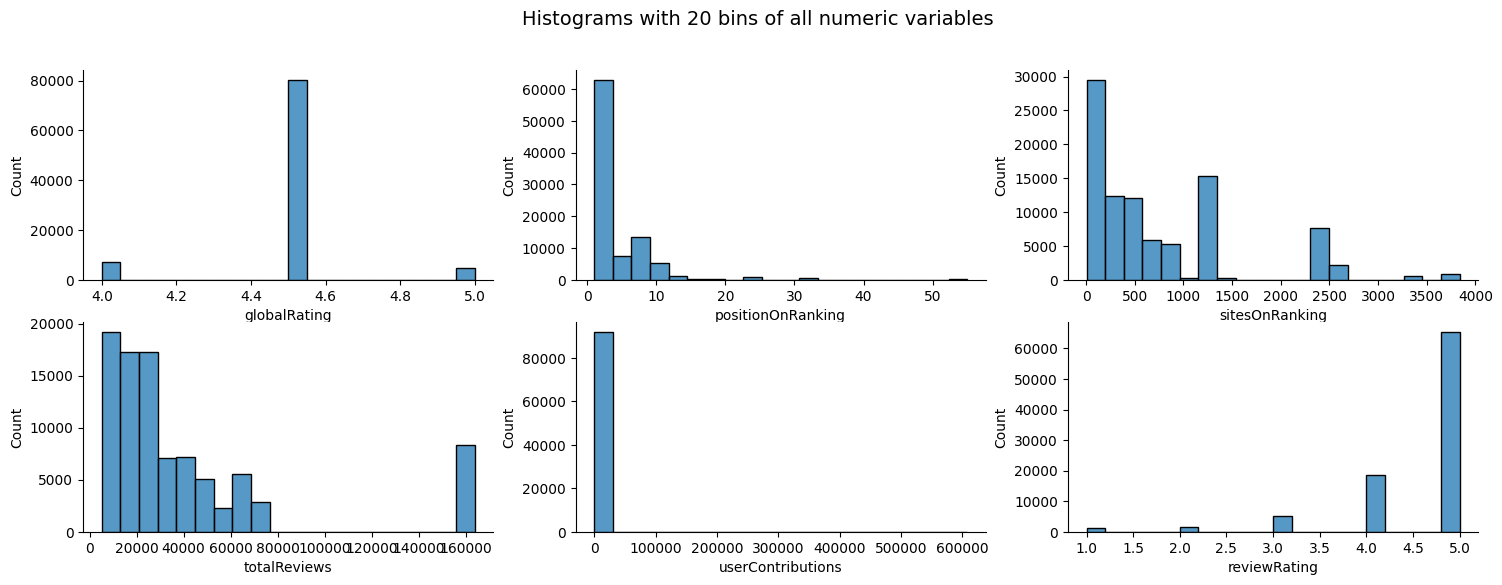

In [59]:
# HISTOGRAM FOR NUMERIC FEATURES IN REVIEWS DATASET
# Identify all numeric variables in the dataset
rnumerical=reviews.select_dtypes(include=[np.number]).columns.tolist()
# Draw
fig, ax = plt.subplots(2, 3, figsize=(18,6))
for var, subplot in zip(reviews[rnumerical], ax.flatten()):
    g = sns.histplot(data=reviews,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

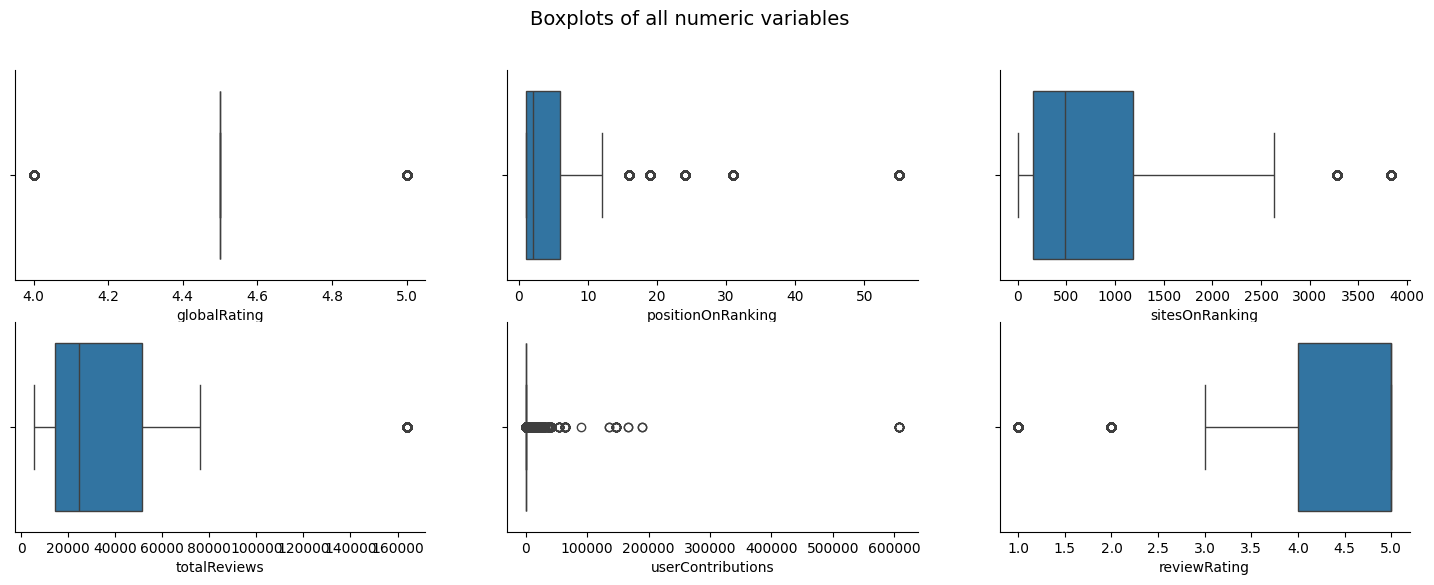

In [60]:
# BOXPLOT FOR NUMERIC VARIABLES IN REVIEWS DATASET
# Draw
fig, ax = plt.subplots(2, 3, figsize=(18,6))
for var, subplot in zip(reviews[rnumerical], ax.flatten()):
    g = sns.boxplot(data=reviews,
                 x=var,
                 ax=subplot)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

<ipython-input-61-a8c4afa48dd3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


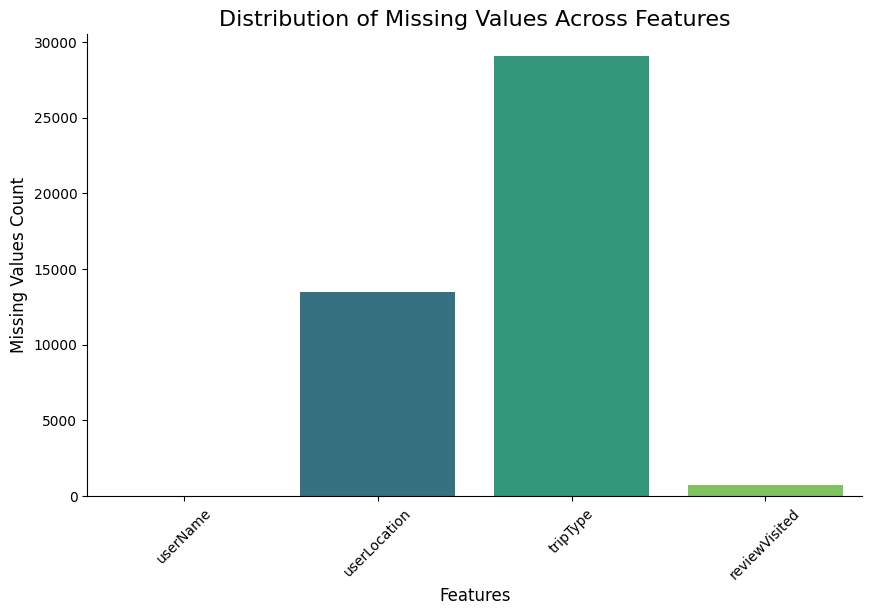

In [61]:
# Distribution of Missing Values across features
# Identify missing values across columns
missing_values = reviews.isnull().sum()
# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]
# Plot the missing values distribution
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
sns.despine()
plt.title("Distribution of Missing Values Across Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Missing Values Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

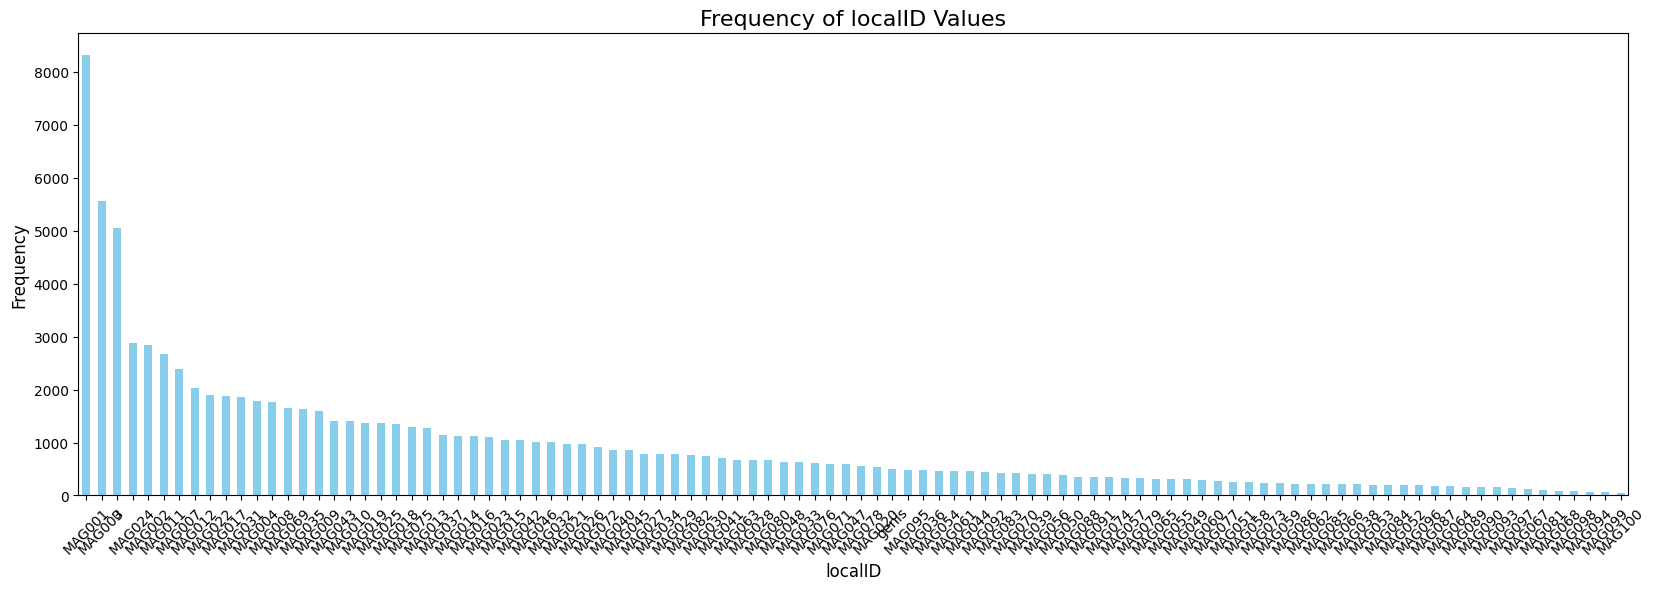

In [62]:
# Count the occurrences of each localID
localID_counts = reviews['localID'].value_counts()

# Plot the bar chart
plt.figure(figsize=(20, 6))
localID_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of localID Values', fontsize=16)
plt.xlabel('localID', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

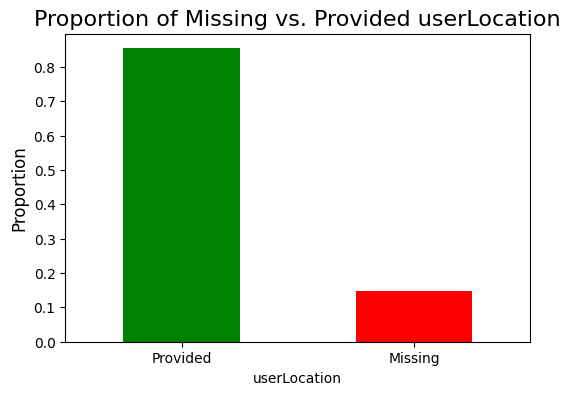

In [63]:
# Create a DataFrame for missing vs. non-missing
userLocation_data = reviews['userLocation'].isna().value_counts(normalize=True).rename({True: 'Missing', False: 'Provided'})

# Plot the stacked bar chart
plt.figure(figsize=(6, 4))
userLocation_data.plot(kind='bar', color=['green', 'red'], stacked=True)
plt.title('Proportion of Missing vs. Provided userLocation', fontsize=16)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)
plt.show()

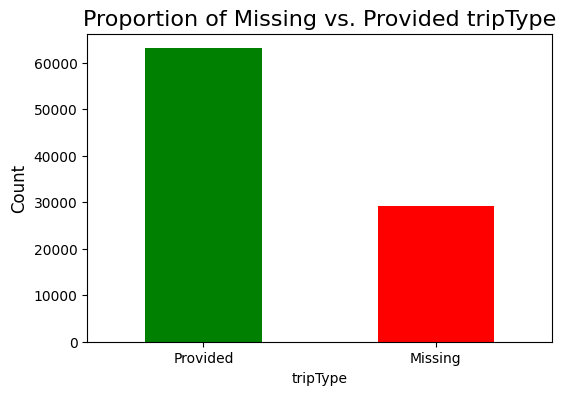

In [64]:
# Count missing and provided tripType
tripType_data = reviews['tripType'].isna().value_counts().rename({True: 'Missing', False: 'Provided'})

# Plot the stacked bar chart
plt.figure(figsize=(6, 4))
tripType_data.plot(kind='bar', color=['green', 'red'], stacked=True)
plt.title('Proportion of Missing vs. Provided tripType', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()


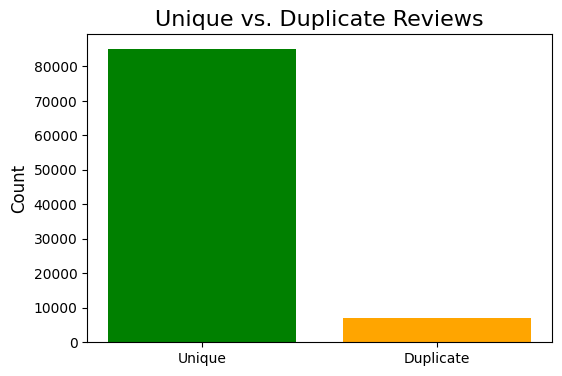

In [65]:
# Count unique and duplicate review texts
unique_reviews = reviews['reviewFullText'].nunique()
duplicate_reviews = len(reviews) - unique_reviews

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Unique', 'Duplicate'], [unique_reviews, duplicate_reviews], color=['green', 'orange'])
plt.title('Unique vs. Duplicate Reviews', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.show()


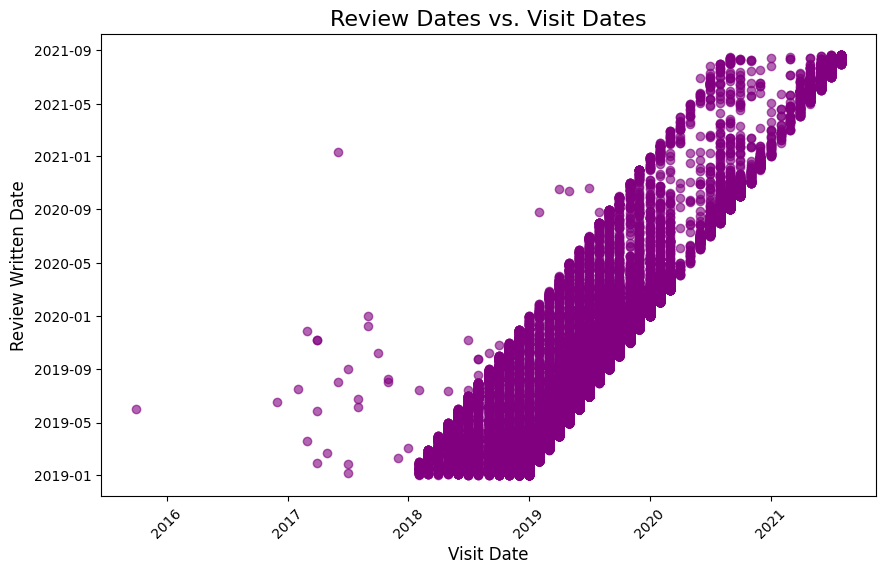

In [66]:
# Filter out rows with missing values for these columns
filtered_reviews = reviews.dropna(subset=['reviewVisited', 'reviewWritten'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_reviews['reviewVisited'], filtered_reviews['reviewWritten'], alpha=0.6, color='purple')
plt.title('Review Dates vs. Visit Dates', fontsize=16)
plt.xlabel('Visit Date', fontsize=12)
plt.ylabel('Review Written Date', fontsize=12)
plt.xticks(rotation=45)
plt.show()


---

<font color='#00D30F'>

### **Attractions** </font> Dataset

<ipython-input-67-e17f7e9c49c0>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90)  # Ensure vertical labels
<ipython-input-67-e17f7e9c49c0>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90)  # Ensure vertical labels


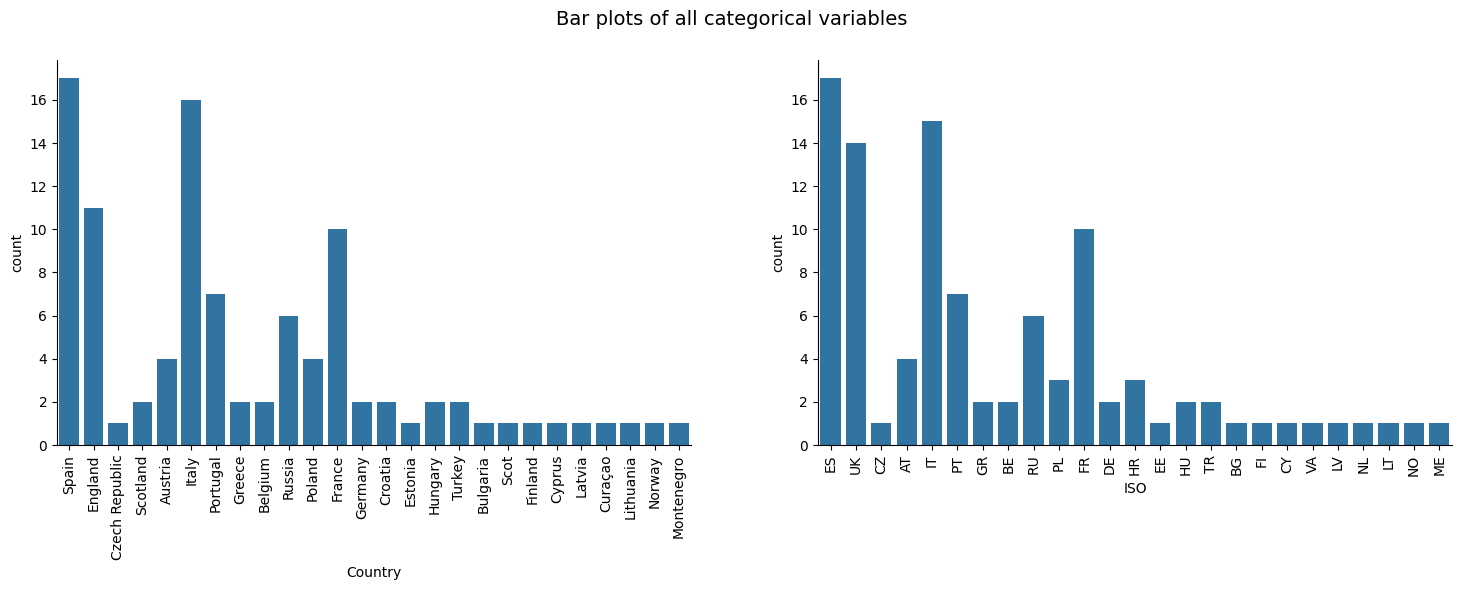

In [67]:
# Select categorical columns in the dataset
acategorical = attractions.select_dtypes(include=[object]).columns.tolist()
#Excluding Name feature
acategorical.remove('Name')
# Draw bar plots
fig, ax = plt.subplots(1, len(acategorical), figsize=(18, 5))
for var, subplot in zip(acategorical, ax.flatten()):
    sns.countplot(data=attractions, x=var, ax=subplot)
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90)  # Ensure vertical labels

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Bar plots of all categorical variables", fontsize=plots_Title_fontSize)
plt.show()

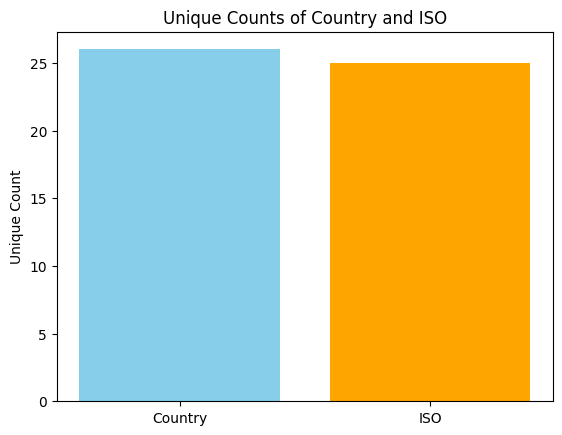

In [68]:
# Count unique values
unique_counts = {
    'Country': attractions['Country'].nunique(),
    'ISO': attractions['ISO'].nunique()
}

# Create bar chart
plt.bar(unique_counts.keys(), unique_counts.values(), color=['skyblue', 'orange'])
plt.title('Unique Counts of Country and ISO')
plt.ylabel('Unique Count')
plt.show()


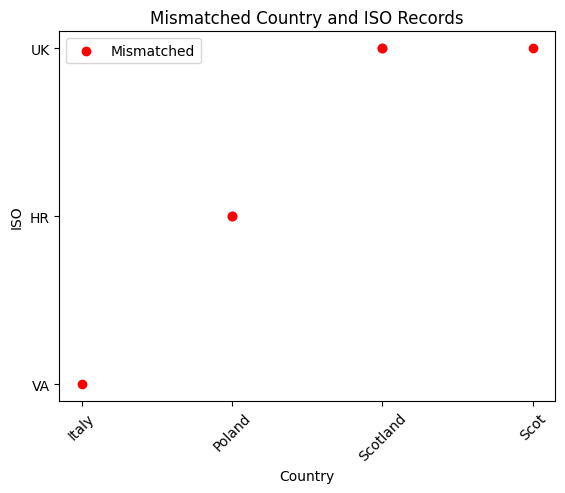

In [69]:
# Filter mismatched rows
mismatched1 = attractions[(attractions['Country'] == 'Italy') & (attractions['ISO'] != 'IT')]
mismatched2 = (attractions[(attractions['Country'] == 'Poland') & (attractions['ISO'] != 'PL')])
mismatched3 = (attractions[(attractions['ISO'] == 'HR') & (attractions['Country'] != 'Croatia')])
mismatched4 = (attractions[(attractions['ISO'] == 'UK') & (attractions['Country'] != 'England')])
mismatched = pd.concat([mismatched1,mismatched2,mismatched3, mismatched4])

plt.scatter(mismatched['Country'], mismatched['ISO'], color='red', label='Mismatched')
plt.title('Mismatched Country and ISO Records')
plt.xlabel('Country')
plt.ylabel('ISO')
plt.legend()
plt.xticks(rotation=45)
plt.show()

---

<font color='#0095DA'>

### **Holidays** </font> Dataset

nº feriados aproveitados por país: countryOrRegion
Sweden              8394
Norway              7924
Argentina           2263
Colombia            2187
Japan               2094
Finland             1934
United Kingdom      1853
Hungary             1826
Croatia             1804
Austria             1676
Brazil              1671
Portugal            1657
South Africa        1651
Poland              1617
Czech               1561
Denmark             1548
Belgium             1547
Italy               1545
New Zealand         1479
Northern Ireland    1429
United States       1420
France              1400
Isle of Man         1392
Slovenia            1387
Canada              1363
Ukraine             1341
Mexico              1316
Netherlands         1315
Scotland            1301
Ireland             1296
Switzerland         1161
Spain               1161
England             1134
Wales               1134
Australia           1049
Germany              980
Belarus              973
India                774

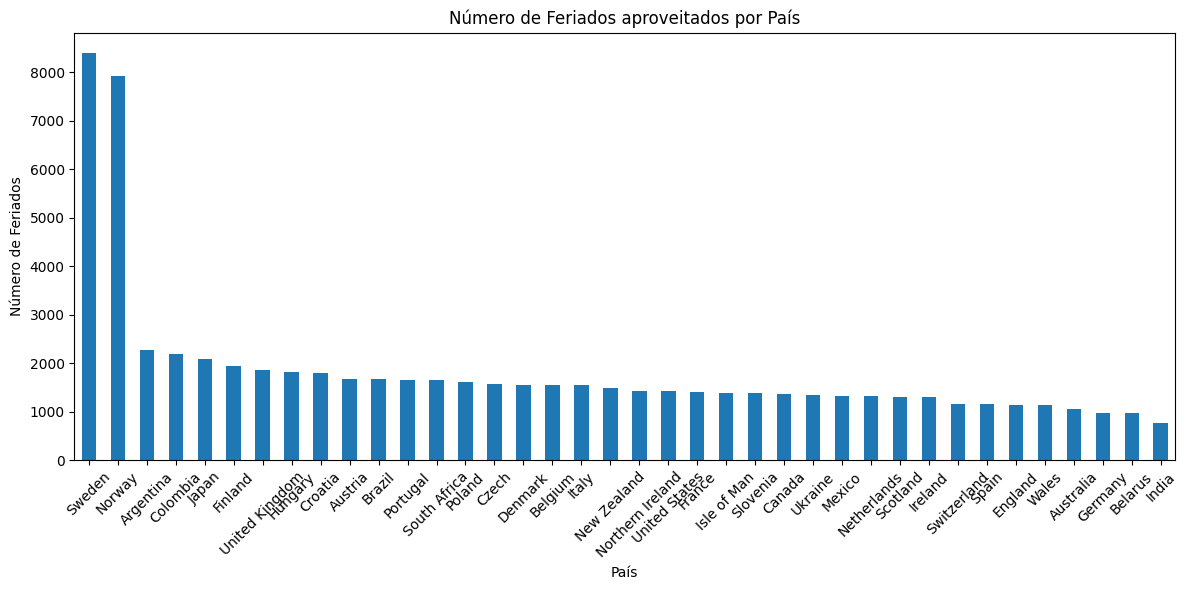

In [70]:
country_counts = holidays['countryOrRegion'].value_counts()
print("nº feriados aproveitados por país:", country_counts)

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Número de Feriados aproveitados por País')
plt.xlabel('País')
plt.ylabel('Número de Feriados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-71-f4cea846e904>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette="muted")


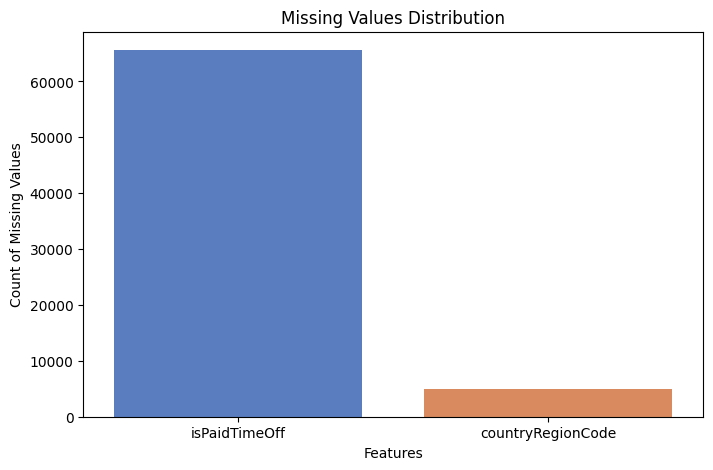

In [71]:
# Count missing values
missing_values = holidays.isnull().sum()
missing_data = missing_values[missing_values > 0]

# Plot missing values
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="muted")
plt.title("Missing Values Distribution")
plt.xlabel("Features")
plt.ylabel("Count of Missing Values")
plt.show()

<ipython-input-72-4ff44892fa5a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_day_counts.head(10), x='Frequency', y='Month-Day', palette='viridis')


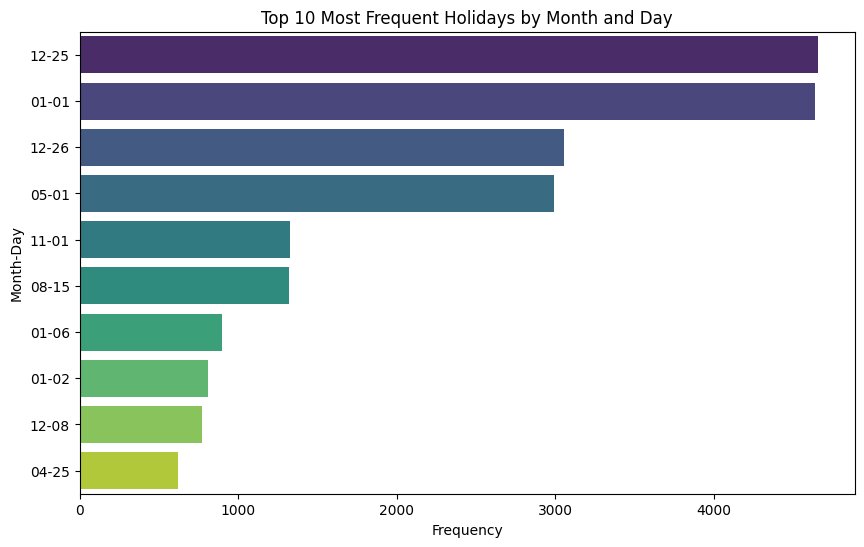

In [72]:
holidays['month_day'] = holidays['date'].dt.strftime('%m-%d')

# Count frequencies
month_day_counts = holidays['month_day'].value_counts().reset_index()
month_day_counts.columns = ['Month-Day', 'Frequency']

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=month_day_counts.head(10), x='Frequency', y='Month-Day', palette='viridis')
plt.title("Top 10 Most Frequent Holidays by Month and Day")
plt.xlabel("Frequency")
plt.ylabel("Month-Day")
plt.show()

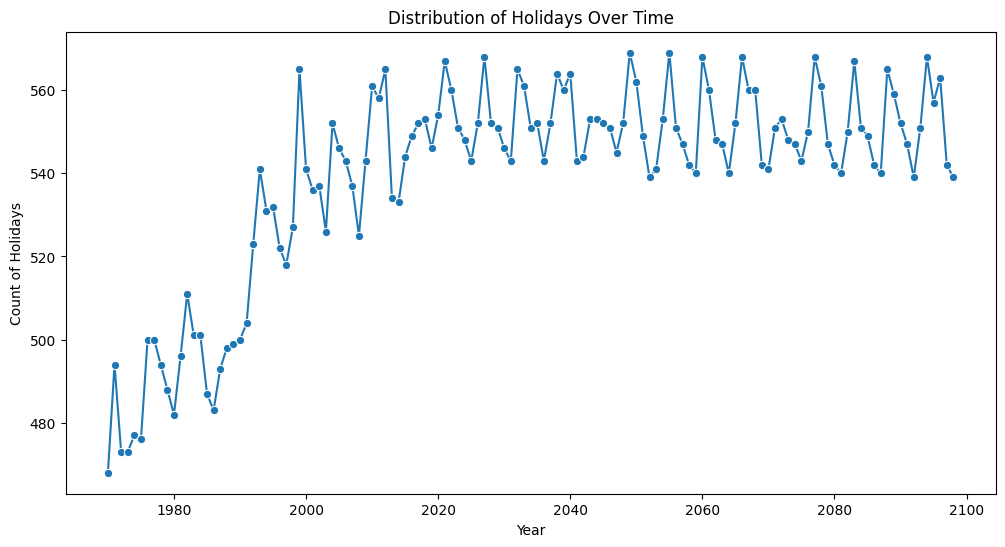

In [73]:
# Extract year
holidays['year'] = holidays['date'].dt.year

# Count holidays by year
year_counts = holidays['year'].value_counts().sort_index()

# Plot distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("Distribution of Holidays Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Holidays")
plt.show()


<ipython-input-74-613f48296b28>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts.head(10), x='Count', y='Country/Region', palette='coolwarm')


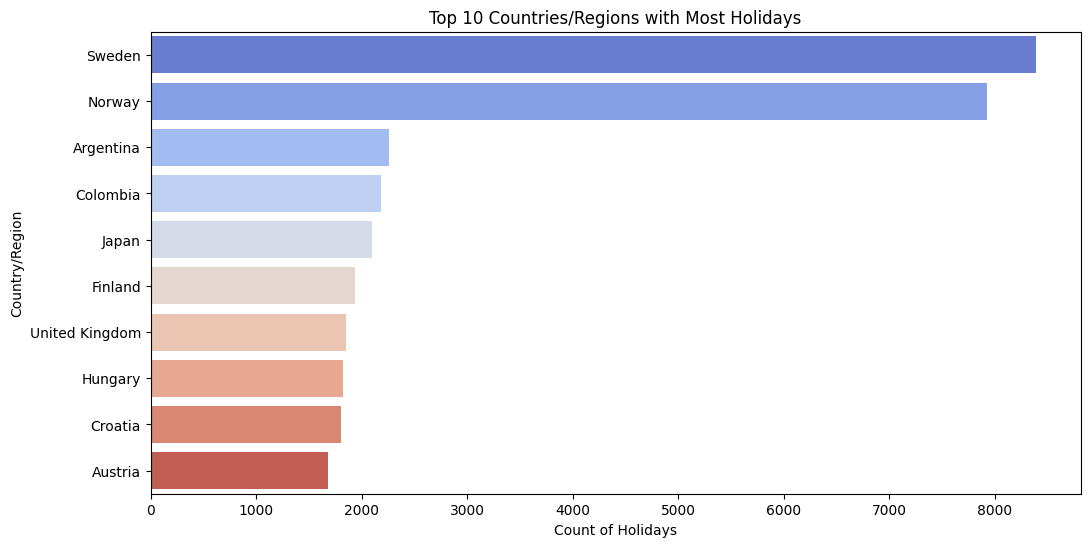

In [74]:
# Count holidays by country
country_counts = holidays['countryOrRegion'].value_counts().reset_index()
country_counts.columns = ['Country/Region', 'Count']

# Plot top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts.head(10), x='Count', y='Country/Region', palette='coolwarm')
plt.title("Top 10 Countries/Regions with Most Holidays")
plt.xlabel("Count of Holidays")
plt.ylabel("Country/Region")
plt.show()


<a name="summary"></a>
## 3. Summary



<font color='#FDB813'>

### **Reviews** </font> Dataset Summary
The Reviews dataset consists of 92,120 entries and 15 features, providing information about reviews posted on TripAdvisor for top European attractions. Below are the main insights based on preliminary analysis, missing values, and incoherence checks by feature:

``localID``:
- Strange values: "genis" and "u" were identified. These values do not seem to follow the expected format and need to be corrected or removed.

``userName``:
- Missing values: 20 entries are missing user names, which is unusual since a review should always have a user name. Further investigation is needed to determine the cause.

``userLocation``:
- Missing values: 13,469 missing values (~15% of the dataset). This could be due to users not providing their location, as it’s not mandatory. This should be further analyzed to determine how to handle missing data.

``userContributions``:
- Maximum:There is 1 entrie with the maximum that can be considered an outlier although they the 11 entries are from the same user.
- Zero value issue: There are entries with a minimum value of 0, which is illogical since users with a review in the dataset must have written at least one review. This needs to be investigated, as it could indicate missing or incorrect data.

``tripType``:
- Missing values: 29,068 missing values (~32% of the dataset). This field often contains 'NaN' values, which suggests that many users did not specify their trip type. Further analysis is required to determine how to address this missing data.

``reviewFullText``:
- Duplicates: Duplicate entries were detected for review texts. This issue should be addressed, possibly by removing duplicate rows or investigating the root cause of these repetitions.

``reviewVisited``:
- Inconsistent entries: Some reviews were written before the visit (review written date precedes the visit date). There are 22 such instances, which may be data errors or require further review.

These are the key features that require attention, and further action in the Data Preparation phase.

---

<font color='#00D30F'>

### **Attractions** </font> Dataset Summary

The Attractions dataset contains 100 entries across 4 columns with no missing values identified. The *.info()* method confirms that all columns are complete. Insights taken from this dataset:

``Name``:
- Among the 100 attraction names, one name is repeated twice. However, these are not duplicates since the associated ID, Country, and ISO fields differ for each entry.

``Country`` and ``ISO``:
- An inconsistency is observed between the Country and ISO columns, as the unique counts are not equal. There are 6 records where the Country and ISO values do not match, indicating a potential data quality issue that needs to be addressed.

---

<font color='#0095DA'>

### **Holidays** </font> Dataset Summary

This data set contains 69557 entries and 6 columns.

``countryOrRegion``:
- Matches correctly with countryRegionCode.

``countryRegionCode``:
- Contains 4,998 missing values (~7% of the dataset).
- No inconsistencies identified with countryOrRegion.

``date``:
- 25,392 records are before 2019, and 42,498 records are after 2021, consisting of recurring holidays (e.g., New Year, Christmas).
- The most frequent holiday date is 2001-01-01, but the most frequent date and month is 12-25.

``isPaidTimeOff``:
- Contains 65,623 missing values (~94% of the dataset) - taking into account that is only available for US, GB, and India.
- Requires conversion to boolean type during data preparation.